# Internship : prodigy
# Task 03

In [5]:
import pandas as pd

# Load the dataset
file_path = '/content/bank-full.csv'
df = pd.read_csv(file_path, sep=';')

# Display basic information and the first few rows of the dataset
data_info = df.info()
data_head = df.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


(None,
    age           job  marital  education default  balance housing loan  \
 0   58    management  married   tertiary      no     2143     yes   no   
 1   44    technician   single  secondary      no       29     yes   no   
 2   33  entrepreneur  married  secondary      no        2     yes  yes   
 3   47   blue-collar  married    unknown      no     1506     yes   no   
 4   33       unknown   single    unknown      no        1      no   no   
 
    contact  day month  duration  campaign  pdays  previous poutcome   y  
 0  unknown    5   may       261         1     -1         0  unknown  no  
 1  unknown    5   may       151         1     -1         0  unknown  no  
 2  unknown    5   may        76         1     -1         0  unknown  no  
 3  unknown    5   may        92         1     -1         0  unknown  no  
 4  unknown    5   may       198         1     -1         0  unknown  no  )

In [6]:
df.shape

(45211, 17)

In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
# Check the frequency of "unknown" values in categorical columns
unknown_counts = df.apply(lambda x: x.value_counts().get('unknown', 0))

unknown_counts


age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

In [9]:
# Replace 'unknown' values with the mode in specific columns
for column in ['job', 'education', 'contact']:
    mode_value = df[column].mode()[0]
    df[column] = df[column].replace('unknown', mode_value)

# Check the unique values in 'poutcome' to decide further
poutcome_unique = df['poutcome'].unique()

poutcome_unique, df['poutcome'].value_counts()

(array(['unknown', 'failure', 'other', 'success'], dtype=object),
 poutcome
 unknown    36959
 failure     4901
 other       1840
 success     1511
 Name: count, dtype: int64)

In [10]:

# Replace 'unknown' values with the mode in specific columns
for column in ['job', 'education', 'contact']:
    mode_value = df[column].mode()[0]
    df[column] = df[column].replace('unknown', mode_value)

# Drop the 'poutcome' column
df = df.drop(columns=['poutcome'])

# Save the cleaned dataset to a new CSV file
cleaned_file_path = '/content/bank-full-cleaned.csv'
df.to_csv(cleaned_file_path, index=False)


In [11]:

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,no
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,no


In [12]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'y'],
      dtype='object')

In [13]:
df.shape

(45211, 16)

In [14]:
# Define a function to cap outliers
def cap_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    column = column.clip(lower_bound, upper_bound)
    return column

# Apply the function to each numerical column
numerical_cols = df.select_dtypes(include=['int64']).columns
for col in numerical_cols:
    df[col] = cap_outliers(df[col])

# Save the cleaned dataset to a new CSV file
cleaned_file_path = '/content/bank-full-withoutoutliers.csv'
df.to_csv(cleaned_file_path, index=False)

In [15]:
from sklearn.preprocessing import OneHotEncoder

# Load the cleaned dataset
file_path = '/content/bank-full-withoutoutliers.csv'
data = pd.read_csv(file_path)

# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Save the encoded dataset to a new CSV file
encoded_file_path = '/content/bank-full_encoding.csv'
data_encoded.to_csv(encoded_file_path, index=False)

# Display the first few rows of the encoded dataset
data_encoded.head()


,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,y_yes
0,58.0,2143,5,261,1,-1,0,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,44.0,29,5,151,1,-1,0,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,33.0,2,5,76,1,-1,0,False,True,False,...,False,False,False,False,False,True,False,False,False,False
3,47.0,1506,5,92,1,-1,0,True,False,False,...,False,False,False,False,False,True,False,False,False,False
4,33.0,1,5,198,1,-1,0,True,False,False,...,False,False,False,False,False,True,False,False,False,False


In [16]:
from sklearn.preprocessing import StandardScaler

# Load the cleaned and encoded dataset
file_path = '/content/bank-full_encoding.csv'
data = pd.read_csv(file_path)

# Identify boolean columns
boolean_cols = data.select_dtypes(include=['bool']).columns

# Convert boolean columns to integers (0 and 1)
data[boolean_cols] = data[boolean_cols].astype(int)

# Identify numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standardization to numerical columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# Save the normalized dataset to a new CSV file
normalized_file_path = '/content/bank-full-normalized.csv'
data.to_csv(normalized_file_path, index=False)

# Display the first few rows of the normalized dataset
data.head()


,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,y_yes
0,1.648117,1.027653,-1.298476,0.147445,-0.870092,0.0,0.0,-0.533603,-0.184415,-0.16793,...,-0.249477,-0.178958,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.363983
1,0.301287,-0.768817,-1.298476,-0.474910,-0.870092,0.0,0.0,-0.533603,-0.184415,-0.16793,...,-0.249477,-0.178958,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.363983
2,-0.756936,-0.791761,-1.298476,-0.899243,-0.870092,0.0,0.0,-0.533603,5.422561,-0.16793,...,-0.249477,-0.178958,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.363983
3,0.589894,0.486333,-1.298476,-0.808718,-0.870092,0.0,0.0,1.874053,-0.184415,-0.16793,...,-0.249477,-0.178958,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.363983
4,-0.756936,-0.792611,-1.298476,-0.208994,-0.870092,0.0,0.0,1.874053,-0.184415,-0.16793,...,-0.249477,-0.178958,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.363983


In [17]:
data.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_secondary', 'education_tertiary',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'y_yes'],
      dtype='object')

In [18]:
data.shape

(45211, 37)

# Feature Engineering on the Cleaned dataset.

In [19]:
# Load the cleaned and normalized dataset
file_path = '/content/bank-full-normalized.csv'
data = pd.read_csv(file_path)

# Display basic information and the first few rows of the dataset
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  45211 non-null  float64
 1   balance              45211 non-null  float64
 2   day                  45211 non-null  float64
 3   duration             45211 non-null  float64
 4   campaign             45211 non-null  float64
 5   pdays                45211 non-null  float64
 6   previous             45211 non-null  float64
 7   job_blue-collar      45211 non-null  float64
 8   job_entrepreneur     45211 non-null  float64
 9   job_housemaid        45211 non-null  float64
 10  job_management       45211 non-null  float64
 11  job_retired          45211 non-null  float64
 12  job_self-employed    45211 non-null  float64
 13  job_services         45211 non-null  float64
 14  job_student          45211 non-null  float64
 15  job_technician       45211 non-null 

# EDA on the Cleaned Dataset.

Summary Statistics:
                 age       balance           day      duration      campaign  \
count  4.521100e+04  4.521100e+04  4.521100e+04  4.521100e+04  4.521100e+04   
mean  -2.816334e-16  5.029167e-18  1.383021e-17 -4.526250e-17 -5.029167e-17   
std    1.000011e+00  1.000011e+00  1.000011e+00  1.000011e+00  1.000011e+00   
min   -2.199968e+00 -2.460762e+00 -1.779108e+00 -1.329233e+00 -8.700916e-01   
25%   -7.569361e-01 -7.322755e-01 -9.380027e-01 -7.464827e-01 -8.700916e-01   
50%   -1.797234e-01 -4.127521e-01  2.326031e-02 -3.108341e-01 -2.451280e-01   
75%    6.860958e-01  4.200485e-01  6.240497e-01  4.755964e-01  3.798357e-01   
max    2.850644e+00  2.148534e+00  1.825628e+00  2.308715e+00  2.254727e+00   

         pdays  previous  job_blue-collar  job_entrepreneur  job_housemaid  \
count  45211.0   45211.0     4.521100e+04      4.521100e+04   4.521100e+04   
mean       0.0       0.0     2.514584e-17      6.035001e-17  -4.997735e-17   
std        0.0       0.0     1.00

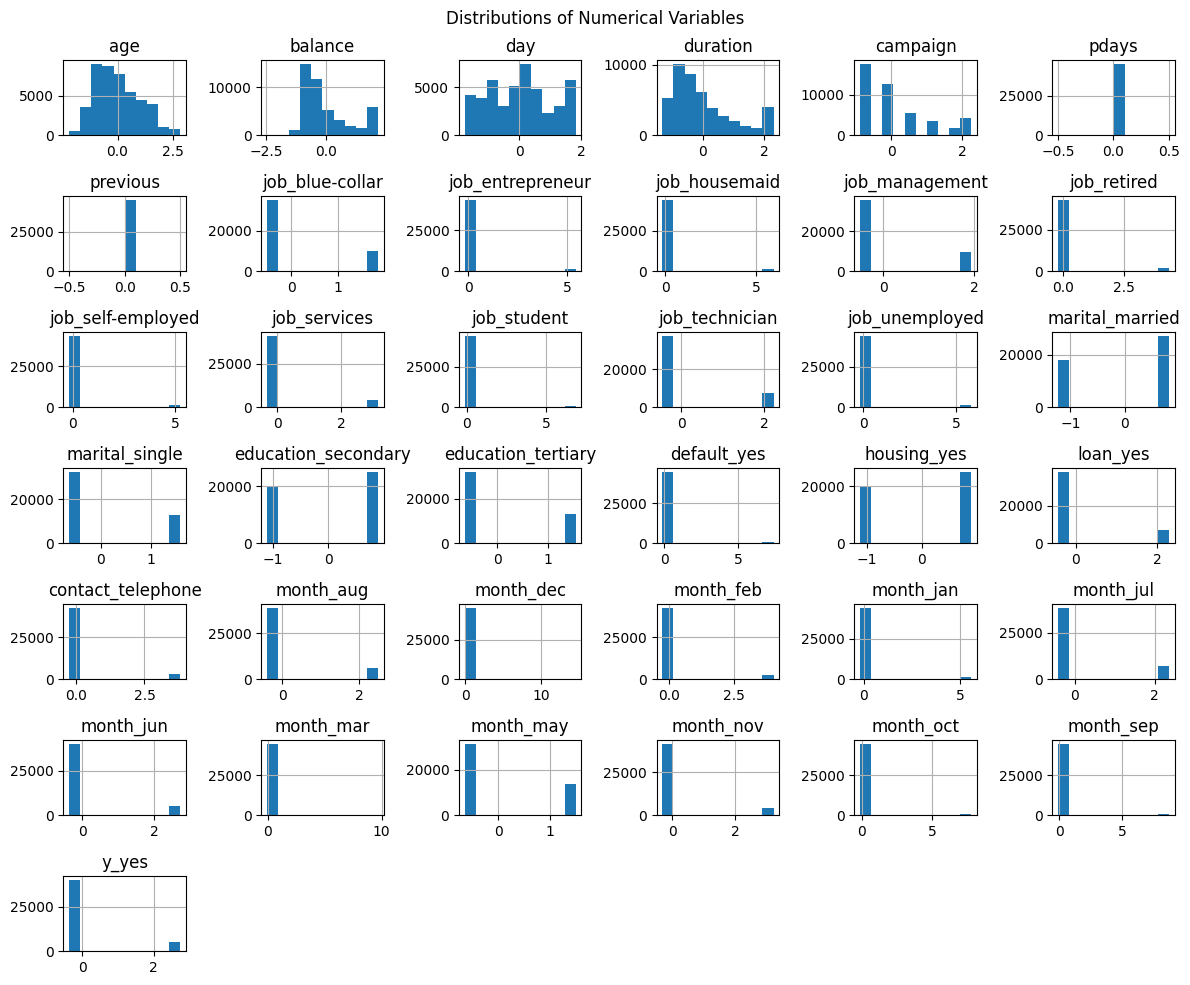

No categorical columns found.


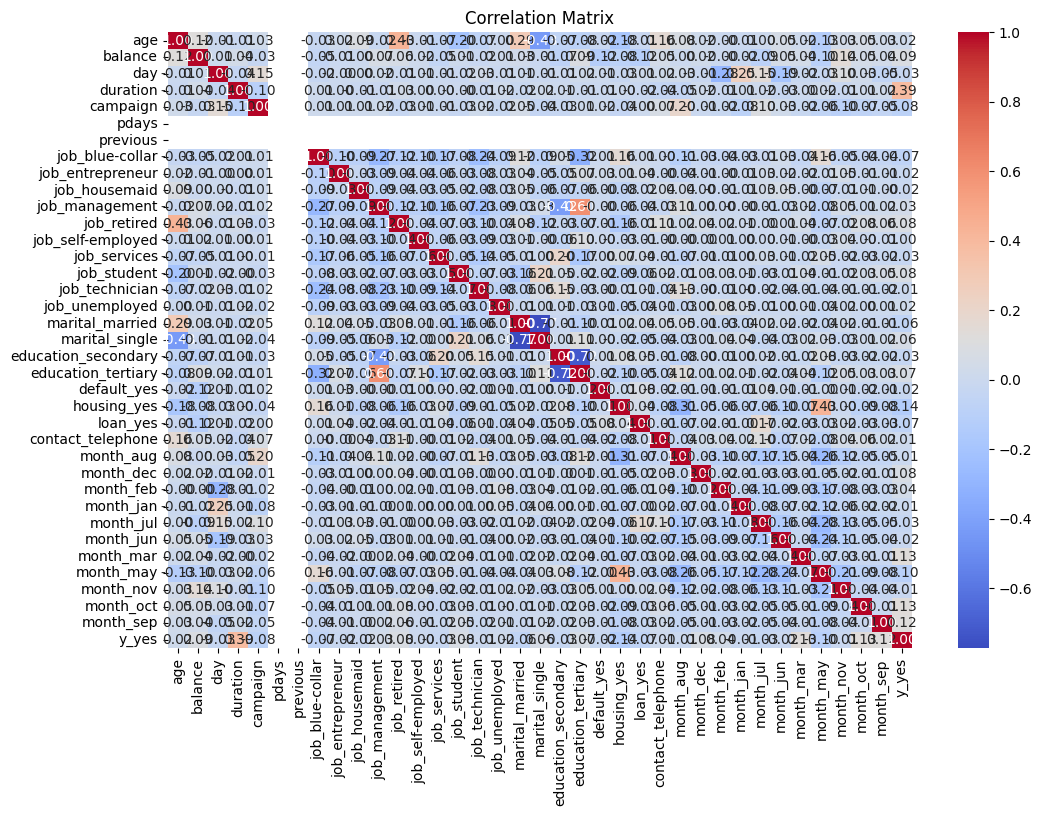

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the cleaned and normalized dataset
file_path = '/content/bank-full-normalized.csv'
data = pd.read_csv(file_path)

# Step 1: Summary Statistics
summary_stats = data.describe()
print("Summary Statistics:\n", summary_stats)

# Step 2: Visualize Distributions of Numerical Variables
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_cols].hist(figsize=(12, 10))
plt.suptitle('Distributions of Numerical Variables')
plt.tight_layout()  # Adjust spacing between plots
plt.show()

# Step 3: Visualize Categorical Variables
categorical_cols = data.select_dtypes(include=['object']).columns  # Corrected line

# Check if there are any categorical columns before plotting
if len(categorical_cols) > 0:
    # Plot count plots for categorical variables
    fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(10, len(categorical_cols) * 4))
    for i, col in enumerate(categorical_cols):
        sns.countplot(x=data[col], ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()
else:
    print("No categorical columns found.")

# Step 4: Correlation Matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Decision Tree Classifier.

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the cleaned and normalized dataset
file_path = '/content/bank-full-normalized.csv'
data = pd.read_csv(file_path)

# Ensure the target column is binary and of integer type
data['y_yes'] = data['y_yes'].astype(int)

# Split the dataset into features and target variable
X = data.drop(columns=['y_yes'])  # Assuming 'y_yes' is the encoded target column
y = data['y_yes']  # This is the target variable indicating subscription

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.8585225597168976
Confusion Matrix:
 [[10998   968]
 [  951   647]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92     11966
           2       0.40      0.40      0.40      1598

    accuracy                           0.86     13564
   macro avg       0.66      0.66      0.66     13564
weighted avg       0.86      0.86      0.86     13564

